FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\results\\WSI\\log/model_ejemplo_0.log'

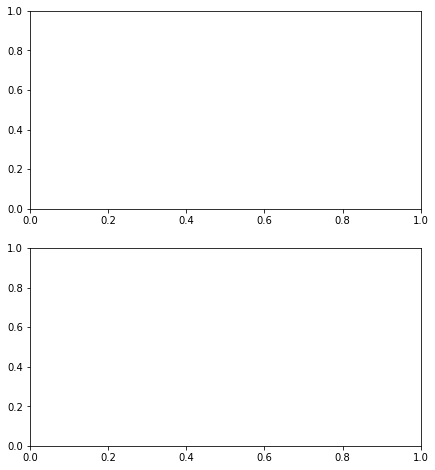

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate
from varname import nameof
import seaborn as sn

#SIMPLE BUENO

#COMPLEX MODEL
MODEL_NAME = "ejemplo"
MODEL_NAMES = [f"{MODEL_NAME}_{SPLIT}" for SPLIT in range(10)]

direc = r"C:\Users\Alejandro\Desktop\heterogeneous-data\results\WSI\log"

def learning_curve(direc, MODEL_NAMES):
    acc_, val_acc_, loss_, val_loss_ = [],[],[],[]

    for MODEL_NAME in MODEL_NAMES:

        acc_df = pd.read_csv(f"{direc}/model_{MODEL_NAME}.log",
                            names=["MODEL_NAME", "TIME", "ACC", "LOSS", "CONF_M", "VAL_PRC", "VAL_ACC", "VAL_LOSS", "VAL_CONF_M", "VAL_REC"])
        
        acc_df = acc_df.loc[acc_df['MODEL_NAME'] == MODEL_NAME]

        acc = acc_df["ACC"].to_numpy()
        loss = acc_df["LOSS"].to_numpy()

        val_acc = acc_df["VAL_ACC"].to_numpy()
        val_loss = acc_df["VAL_LOSS"].to_numpy()
    
        acc_.append(acc)
        loss_.append(loss)

        val_acc_.append(val_acc)
        val_loss_.append(val_loss)

    print(len(acc_))

    acc = np.mean(acc_, axis=0)
    loss = np.mean(loss_, axis=0)
    val_acc = np.mean(val_acc_, axis=0)
    val_loss = np.mean(val_loss_, axis=0)

    acc_err = np.std(acc_, axis=0)
    loss_err = np.std(loss_, axis=0)
    val_acc_err = np.std(val_acc_, axis=0)
    val_loss_err = np.std(val_loss_, axis=0)

    t = range(len(acc))
    
    axs[0].legend("MODEL_NAME", loc=2)

    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Accuracy")

    axs[0].plot(t,acc, 'o' , ls ="-", label= "Training")
    axs[0].plot(t,val_acc, 'o', ls ="-", label= "Validation")


    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Binary cross entropy")

    axs[1].plot(t,loss, 'o', ls ="-", label= "Training")
    axs[1].plot(t,val_loss, 'o', ls ="-", label= "Validation")


    for idx, i in enumerate([loss, val_loss, acc , val_acc]):
        x = t
        y = i
        x_list = np.linspace(0,20,100)
        poly = np.polyfit(x, y,5)
        poly_y = np.poly1d(poly)(x_list)

        if idx<2:
            if nameof(i)==nameof(acc):
                err = acc_err
            else:
                err = val_acc_err
            #axs[1].plot(x_list, poly_y)
            axs[1].fill_between(t, y + err,
                     y - err, alpha=0.1,)
        else:
            if nameof(i)==nameof(loss):
                err = loss_err
            else:
                err = val_loss_err
            #axs[0].plot(x_list, poly_y)
            axs[0].fill_between(t, y + err,
                     y - err, alpha=0.1,)

    axs[0].legend(loc = "lower right")
    axs[1].legend()
    fig.show()
    fig.savefig(f"C:/Users/Alejandro/Desktop/heterogeneous-data/results/WSI/lc/l_curve_{MODEL_NAME[0]}.pdf")

fig, axs = plt.subplots(2, figsize = (7,8))

learning_curve(direc, MODEL_NAMES)

In [17]:
conf = np.array([[475,        20],
                [43,         158]])
                
MODEL_NAME = "ejemplo0"

acc_df = pd.read_csv(f"{direc}/model_{MODEL_NAME}.log",
                            names=["MODEL_NAME", "TIME", "ACC", "LOSS", "CONF_M", "VAL_PRC", "VAL_ACC", "VAL_LOSS", "VAL_CONF_M", "VAL_REC"])

conf = acc_df["CONF_M"]#[0]

In [18]:
print(conf)

Series([], Name: CONF_M, dtype: object)


In [7]:
direc = "FT_DATAUG_BUENO"


def evaluate(direc, MODEL_NAMES, conf):

    fig, ax = plt.subplots()
        
    lab = ["Negative", "Positive"]

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sn.heatmap(conf, annot=labels, fmt='', cmap='Blues', ax= ax)

    ax.set_xticklabels(lab)
    ax.set_yticklabels(lab)

    ax.set_xlabel("Predicted class")
    ax.set_ylabel("True class")

    fig.savefig(f"conf_matrix_{direc}.pdf")


[[1 2]
 [0 1]]


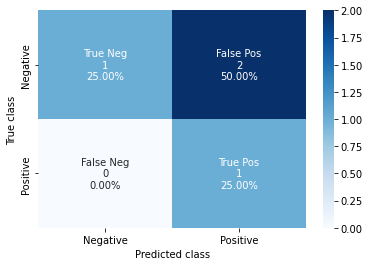

In [8]:
from sklearn.metrics import confusion_matrix
x=confusion_matrix([0, 1, 0, 0], [1, 1, 1, 0])
print(x) # TRUE, PRED por lo que filas => TRUE CLASS y columnas => PREDICTED CLASS
'''
00 = TP
01 = FP
10 = FN
11 = TN 
(0, 2, 1, 1)
'''

MODEL_NAMES = ""

evaluate(direc, MODEL_NAMES, x)

PRC = 00/(00+01) # TP/TP+FP
REC = 00/(00+10) # TP/TP+FN

F1 = conf_m[0][0]/(conf_m[0][0]+0.5*(conf_m[1][0]+conf_m[0][1])) # TP/(TP+(FN+FP)/2)
F1 = 2*PRC*REC/(PRC+REC)


Thus in binary classification, the count of true negatives is C_00 , false negatives is C_10, true positives is C_11 and false positives is C_01
